### **ICESat数据查看**

In [2]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from pyrsimg import readTiff, imgShow, second_to_dyr


In [3]:
path_glah14 = 'data/laser/GLAH14_634_2123_002_0351_0_01_0001.H5'
path_rsimg = 'data/rsimg/s2_gla_region_20220707.tif'


In [6]:
# !h5ls $path_glah14
# !h5ls $path_glah14/Data_40HZ
!h5ls $path_glah14/Data_40HZ/Elevation_Surfaces


d_LandVar                Dataset {1094280/Inf}
d_elev                   Dataset {1094280/Inf}
d_refRng                 Dataset {1094280/Inf}


In [ ]:
with h5py.File(path_glah14,'r') as glah14:
    lat = glah14['Data_40HZ/Geolocation/d_lat'][:]
    lon = glah14['Data_40HZ/Geolocation/d_lon'][:]
    elev = glah14['Data_40HZ/Elevation_Surfaces/d_elev'][:]
    time = glah14['Data_40HZ/Time/d_UTCTime_40'][:]

print(lat.shape)
## remote sensing image
rsimg = readTiff(path_rsimg)


(1094280,)


In [ ]:
### time conversion (seconds to decimal year)
### Seconds (from 2000-01-01 00:00:00) to decimal year
time = second_to_dyr(time)


In [25]:
### 剔除位置异常值
idx = np.where((abs(lat)<90) & (lon<360) & (lon>0))
lat, lon, elev = lat[idx], lon[idx], elev[idx]
print(lat.shape)


(979753,)


In [27]:
lon


array([162.040871, 162.04043 , 162.039992, ..., 213.259785, 213.258044,
       213.256311], shape=(979753,))

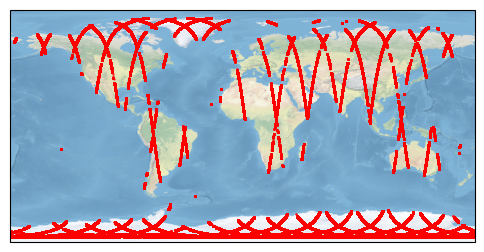

In [ ]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(6, 6))
cycle, track_start = path_glah14.split('/')[-1].split('_')[3], path_glah14.split('/')[-1].split('_')[4]
orbit_isat = 'cycle_'+str(cycle)+'-track_'+str(track_start)
## icesat
ax = fig.add_subplot(111, projection=proj);
ax.stock_img()
## convert lon range [0,360] to [-180, 180], cartopy经度区间默认为0-360
lon_ = lon.copy()
lon_[lon_>180] = lon_[lon_>180]-360
ax.plot(lon_, lat, marker='.', markersize=1, linewidth=0.0, label=orbit_isat, color='red')
# ax.gridlines(draw_labels=True, linewidth=1, color='gray', linestyle='--')
# ax.legend();
# plt.title('icesat')


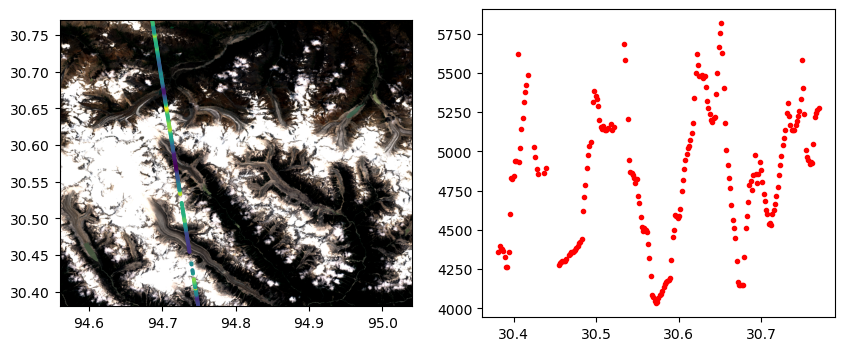

In [40]:
## study region: [94.56, 30.38, 95.04, 30.77]
ids = np.where((lat>30.38) & (lat<30.77) & (lon >94.56) & (lon<95.04))
fig, ax = plt.subplots(1,2, figsize=(10, 4))
imgShow(rsimg.array, extent=rsimg.geoextent, clip_percent=20, ax=ax[0])
ax[0].scatter(x=lon_[ids], y=lat[ids], s=3.5, c=elev[ids])
ax[1].plot(lat[ids], elev[ids], 'r.')

